<a href="https://colab.research.google.com/github/thephoenix2048/Assignments/blob/main/FoodClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import cv2

Image shape ->  (269, 478)
Color channels ->  3
Min color depth : 0, Max color depth 255


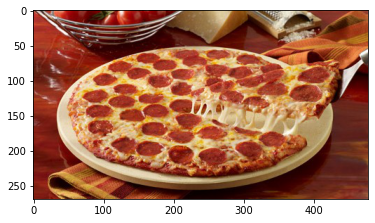

In [ ]:
img = plt.imread('/content/drive/MyDrive/TechnolutionAssignments/train/pizza/Image_40.jpg')
dims = np.shape(img)
plt.imshow(img)
print("Image shape -> ",dims[:2])
print("Color channels -> ",dims[2])
print("Min color depth : {}, Max color depth {}".format(np.min(img),np.max(img)))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

n_classes = 4
batch_size = 32
img_width, img_height = 300, 300

train_data_dir = '/content/drive/MyDrive/TechnolutionAssignments/train'

# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_data_dir = '/content/drive/MyDrive/TechnolutionAssignments/val'

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 146 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [ ]:
class_map = train_generator.class_indices
class_map

{'burger': 0, 'pizza': 1, 'sandwich': 2, 'sushi': 3}

In [ ]:
category={0:'burger', 1:'pizza', 2:'sandwich', 3:'sushi'}

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

nb_train_samples = 146 
nb_validation_samples = 40

inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='v1_inceptionV3', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_v1_inceptionV3.log')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=val_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer, early_stopping])

<ipython-input-23-6fbc69fac000>:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 1.3922 - accuracy: 0.3596
Epoch 1: val_loss improved from inf to 1.00567, saving model to v1_inceptionV3


4/4 [==============================] - 52s 12s/step - loss: 1.3922 - accuracy: 0.3596 - val_loss: 1.0057 - val_accuracy: 0.7188
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 0.8120 - accuracy: 0.7895
Epoch 2: val_loss improved from 1.00567 to 0.41894, saving model to v1_inceptionV3


4/4 [==============================] - 37s 12s/step - loss: 0.8120 - accuracy: 0.7895 - val_loss: 0.4189 - val_accuracy: 0.9375
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 0.3285 - accuracy: 0.9561
Epoch 3: val_loss improved from 0.41894 to 0.22259, saving model to v1_inceptionV3


4/4 [==============================] - 37s 12s/step - loss: 0.3285 - accuracy: 0.9561 - val_loss: 0.2226 - val_accuracy: 0.9375
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 1.0000
Epoch 4: val_loss improved from 0.22259 to 0.08418, saving model to v1_inceptionV3


4/4 [==============================] - 36s 11s/step - loss: 0.1056 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 1.0000
Epoch 5: val_loss improved from 0.08418 to 0.06557, saving model to v1_inceptionV3


4/4 [==============================] - 36s 12s/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 1.0000
Epoch 6: val_loss did not improve from 0.06557
4/4 [==============================] - 6s 2s/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 1.0000


In [ ]:
model.save('model_v1_inceptionV3.h5')

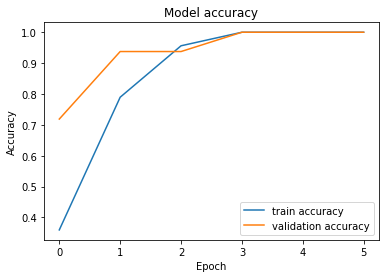

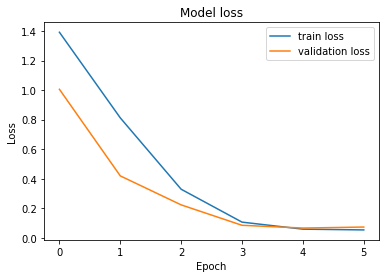

In [ ]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

In [ ]:
K.clear_session()
path_to_model='./model_v1_inceptionV3.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [ ]:
test_data_dir = '/content/drive/MyDrive/TechnolutionAssignments/test'

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 12 images belonging to 4 classes.


In [ ]:
scores = model.evaluate_generator(test_generator)

print("Test Accuracy: {:.3f}".format(scores[1]))

<ipython-input-34-2ad62acfc568>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)


Test Accuracy: 0.917


1/1 [==============================] - 0s 33ms/step


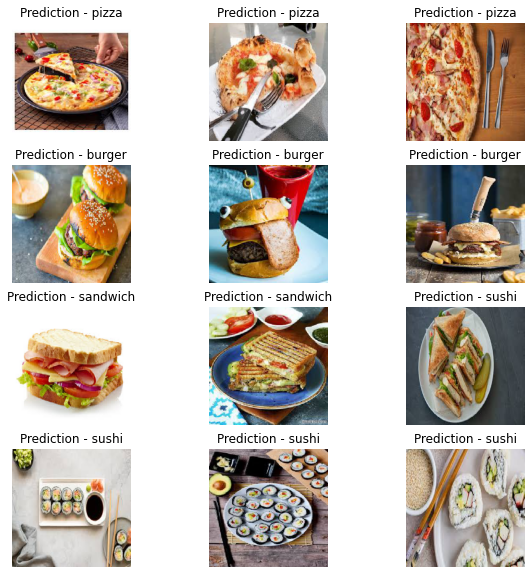

In [ ]:
import os
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    #plt.title("Prediction - {}".format(category[index]))
    #plt.imshow(img_array)
    return img_array,index

w=10
h=10
fig = plt.figure(figsize=(10, 10))
columns = 3
rows = 4
i=1
for file in os.listdir('/content/drive/MyDrive/TechnolutionAssignments/test'):
    for img in os.listdir('/content/drive/MyDrive/TechnolutionAssignments/test'+'/'+file):
        filename = '/content/drive/MyDrive/TechnolutionAssignments/test'+'/'+file+'/'+img
        img_array,index=predict_image(filename,model)
        fig.add_subplot(rows, columns, i)
        plt.title("Prediction - {}".format(category[index]))
        plt.axis('off')
        plt.imshow(img_array)
        #plt.plot(img_array)
        i+=1